# Assignment (Machine learning Assignment From MoneyLion)  Name: Ritvik Johnson Email: ritvikjohnson5@gmail.com

### In this challenge, we invite you to develop a bank transaction categorization model (i.e. enrich their bank transactions into categories) to solve this business use case. You should discuss how you plan to develop this model, showcase the model implementation process, produce a proof of concept model as well as discuss the viability of the proposed solution for the business use case (i.e can we use the results of the model to provide financial insights to our users?). This proposal will be used to make a decision on whether we should replace our existing system with this model.

#### You are provided with the following files to get you started on this challenge:

#### 1. bank_transaction.csv
####     ● This dataset contains users bank transactions data and example categories (e.g. Loans, Restaurants, Supermarkets and Groceries, Insurance)

#### 2. user_profile.csv
####     ● This dataset contains a selected set of users and their financial profiles

#### 3. data_dictionary.pdf
####     ● Detailed descriptions and definitions of each column within the datasets provided is available in this file.

#### We are looking for the following items for this challenge:

#### 1. Ideas and plan to implement the bank transaction categorization model
####     ● Ensure to provide supporting data analyses leading to the developed model and justifications for the chosen model.
####     ● Discuss what are possible short, medium and long term plans on how to develop the model.
#### 2. Develop the model given the time restrictions.
####     ● Ensure to provide functional code to create this model.
####     ● Code out the development process and explain the code in detail.
#### 3. Final proposal and viability of using the model
####     ● Provide justifications of using this model
####     ● Include considerations and constraints of using this model

In [ ]:
#!pip install panda
#!pip install numpy
#!pip install spacy
#!pip install nltk
#!pip install scikit-learn
#!pip install xgboost
#!pip install swifter
#!pip install tqdm
#!pip install matplotlib
#!pip install seaborn

In [1]:
try:
    import json
    import os
    
    import pandas as  pd
    import numpy as np
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline

    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
df1 = pd.read_csv("data/bank_transaction.csv")
df2 = pd.read_csv("data/user_profile.csv")

In [4]:
df = pd.merge(df1, df2, left_on = ['client_id'], right_on = ['CLIENT_ID'], how = 'inner')
df.head()

,client_id,bank_id,account_id,txn_id,txn_date,description,amount,category,CLIENT_ID,IS_INTERESTED_INVESTMENT,IS_INTERESTED_BUILD_CREDIT,IS_INTERESTED_INCREASE_INCOME,IS_INTERESTED_PAY_OFF_DEBT,IS_INTERESTED_MANAGE_SPENDING,IS_INTERESTED_GROW_SAVINGS
0,1,1,1,4,2023-09-29 00:00:00,Earnin PAYMENT Donat...,20.0,Loans,1,False,False,False,False,False,False
1,1,1,1,3,2023-08-14 00:00:00,ONLINE TRANSFER FROM NDonatas DanyalDA O CARSO...,25.0,Transfer Credit,1,False,False,False,False,False,False
2,1,1,1,5,2023-09-25 00:00:00,MONEY TRANSFER AUTHOR...,20.0,Loans,1,False,False,False,False,False,False
3,1,1,2,1,2023-06-02 00:00:00,ONLINE TRANSFER FROM CARSON N EVERYDAY CHECKIN...,16.0,Transfer Credit,1,False,False,False,False,False,False
4,1,1,2,2,2023-06-01 00:00:00,ONLINE TRANSFER FROM CARSON N EVERYDAY CHECKIN...,4.0,Transfer Credit,1,False,False,False,False,False,False


# Convert Uncategorized to nan

In [5]:
#df.dropna(subset=["category"], inplace=True)
df['category'] = df['category'].replace('Uncategorized', pd.NA)

In [6]:
df.info

<bound method DataFrame.info of         client_id  bank_id  account_id  txn_id             txn_date  \
0               1        1           1       4  2023-09-29 00:00:00   
1               1        1           1       3  2023-08-14 00:00:00   
2               1        1           1       5  2023-09-25 00:00:00   
3               1        1           2       1  2023-06-02 00:00:00   
4               1        1           2       2  2023-06-01 00:00:00   
...           ...      ...         ...     ...                  ...   
258774        880      488         557   19800  2023-08-14 00:00:00   
258775        880      488         557     718  2023-07-03 00:00:00   
258776        880      488         557   56777  2023-08-21 00:00:00   
258777        880      488         557  150548  2023-07-10 00:00:00   
258778        880      488         557  125702  2023-09-18 00:00:00   

                                              description  amount  \
0       Earnin           PAYMENT              

In [7]:
df.isnull().sum()

client_id                            0
bank_id                              0
account_id                           0
txn_id                               0
txn_date                             0
description                          0
amount                               0
category                         29649
CLIENT_ID                            0
IS_INTERESTED_INVESTMENT             0
IS_INTERESTED_BUILD_CREDIT           0
IS_INTERESTED_INCREASE_INCOME        0
IS_INTERESTED_PAY_OFF_DEBT           0
IS_INTERESTED_MANAGE_SPENDING        0
IS_INTERESTED_GROW_SAVINGS           0
dtype: int64

In [8]:
df['category'].value_counts()

category
Third Party                   28714
Restaurants                   26367
Transfer Credit               21561
Loans                         19605
Convenience Stores            18630
Supermarkets and Groceries    16750
Transfer Debit                15114
Gas Stations                  12919
Internal Account Transfer     11983
Payroll                        8100
Shops                          7418
Bank Fees                      6432
Transfer                       6275
ATM                            5672
Transfer Deposit               4976
Digital Entertainment          4525
Utilities                      4118
Clothing and Accessories       3190
Department Stores              2002
Insurance                      1754
Service                         910
Arts and Entertainment          397
Travel                          367
Food and Beverage Services      343
Interest                        280
Check Deposit                   211
Healthcare                      207
Telecommunication S

In [9]:
df['category'].unique()

array(['Loans', 'Transfer Credit', 'Transfer Deposit', 'Payroll', <NA>,
       'Restaurants', 'Check Deposit', 'Third Party',
       'Food and Beverage Services', 'Internal Account Transfer', 'Shops',
       'Supermarkets and Groceries', 'Telecommunication Services',
       'Bank Fees', 'Utilities', 'Insurance', 'Clothing and Accessories',
       'Digital Entertainment', 'Transfer', 'Gyms and Fitness Centers',
       'Department Stores', 'Healthcare', 'Gas Stations', 'Service',
       'Travel', 'Arts and Entertainment', 'Convenience Stores',
       'Interest', 'Tax Refund', nan, 'Transfer Debit', 'ATM', 'Bank Fee',
       'Payment'], dtype=object)

<Axes: xlabel='category'>

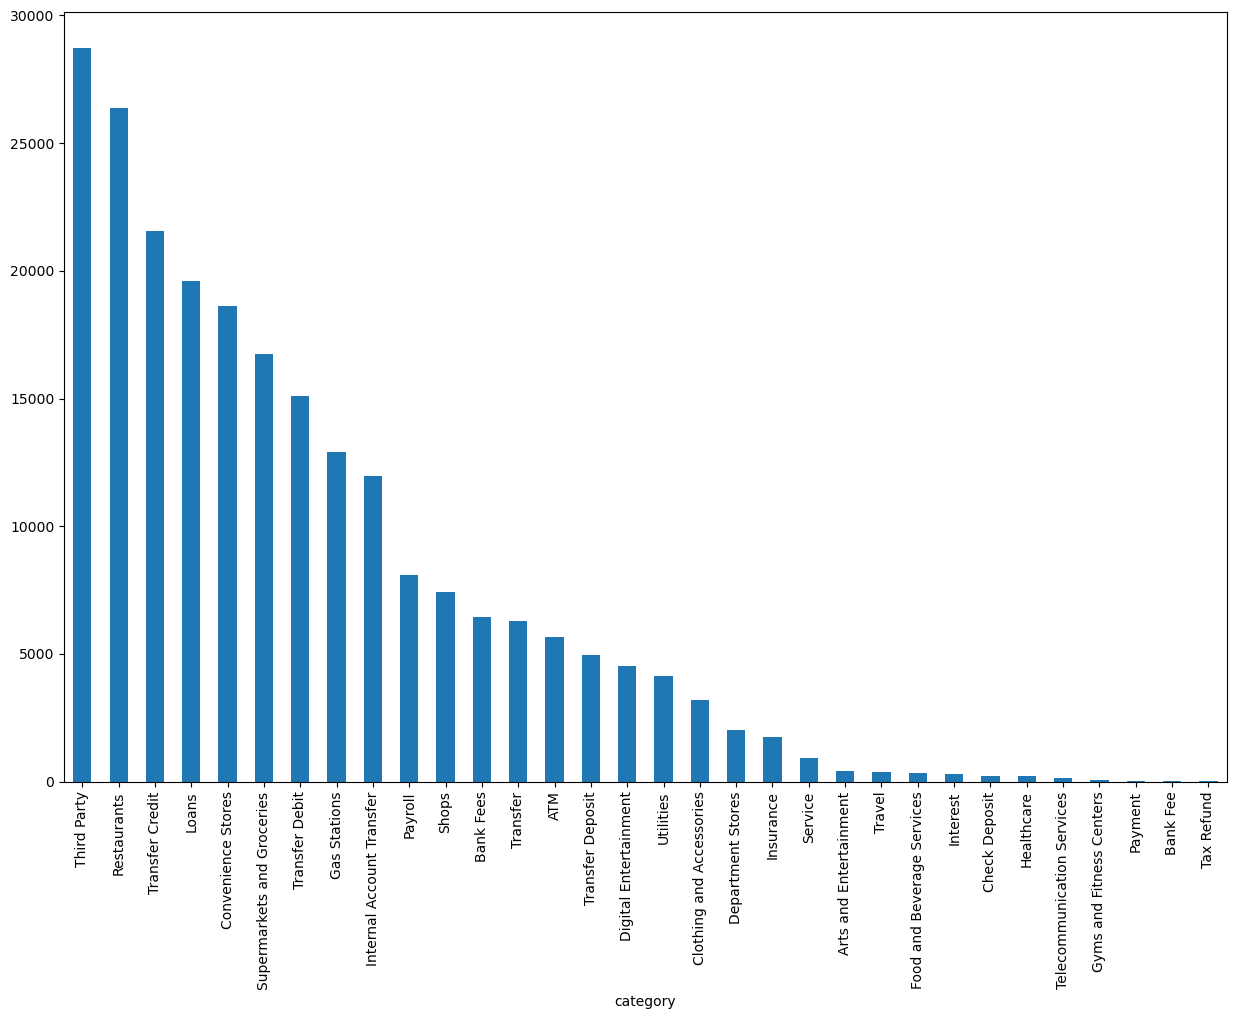

In [10]:
df['category'].value_counts().plot(kind = 'bar', figsize = (15, 10))

# Check For Duplicate Record

In [11]:
duplicate_rec = df[df.duplicated(keep=False)]

d_r_sorted = duplicate_rec.sort_values(by=['category', 'description'])
print(d_r_sorted.shape)
d_r_sorted.head(15)

(0, 15)


,client_id,bank_id,account_id,txn_id,txn_date,description,amount,category,CLIENT_ID,IS_INTERESTED_INVESTMENT,IS_INTERESTED_BUILD_CREDIT,IS_INTERESTED_INCREASE_INCOME,IS_INTERESTED_PAY_OFF_DEBT,IS_INTERESTED_MANAGE_SPENDING,IS_INTERESTED_GROW_SAVINGS


# Natural Language Processing

In [12]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()


def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)    
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [13]:
df['description'] = df['description'].swifter.apply(clean_txt)

Pandas Apply:   0%|          | 0/258779 [00:00<?, ?it/s]

# Balance the Categorical data

In [14]:
from imblearn.over_sampling import RandomOverSampler

# Separate the dataset in label and unlabel dataset with respect to category data
labeled_data = df.dropna(subset=['category'])
unlabeled_data = df[df['category'].isnull()]

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(labeled_data[['description']], labeled_data['category'])

In [15]:
X_resampled

,description
0,earnin payment donatas danyal
1,online transfer ndonatas danyalda carson busin...
2,money transfer authorize earnin cdaej_b
3,online transfer carson everyday check
4,online transfer carson everyday check
...,...
918843,round check
918844,round
918845,round check
918846,reliant energy


In [16]:
y_resampled

0                   Loans
1         Transfer Credit
2                   Loans
3         Transfer Credit
4         Transfer Credit
               ...       
918843          Utilities
918844          Utilities
918845          Utilities
918846          Utilities
918847          Utilities
Name: category, Length: 918848, dtype: object

# Train Test Split

In [17]:
X = X_resampled
y = y_resampled

# lable the category feature data
encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
v = dict(zip(list(y), labeled_data['category'].to_list()))
print(v)

{16: 'Loans', 27: 'Transfer Credit', 29: 'Transfer Deposit', 18: 'Payroll', 19: 'Restaurants', 4: 'Check Deposit', 25: 'Third Party', 9: 'Food and Beverage Services', 15: 'Internal Account Transfer', 21: 'Shops', 22: 'Supermarkets and Groceries', 24: 'Telecommunication Services', 3: 'Bank Fees', 31: 'Utilities', 13: 'Insurance', 5: 'Clothing and Accessories', 8: 'Digital Entertainment', 26: 'Transfer', 11: 'Gyms and Fitness Centers', 7: 'Department Stores', 12: 'Healthcare', 10: 'Gas Stations', 20: 'Service', 30: 'Travel', 1: 'Arts and Entertainment', 6: 'Convenience Stores', 14: 'Interest', 23: 'Tax Refund', 28: 'Transfer Debit', 0: 'ATM', 2: 'Bank Fee', 17: 'Payment'}


# Create Model Pipeline

### NB

Model_NB = Pipeline([
     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf', MultinomialNB(alpha=.01)),
 ])

### XGB

import xgboost as xgb
Model_XGB = Pipeline([
     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf' , xgb.XGBClassifier(tree_method="hist")),
 ])

### SVC

from sklearn.svm import SVC
Model_SVC = Pipeline([
     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf' , SVC()),
 ])

### RFC

In [18]:
# Random Forest Classifier is the best for this model

from sklearn.ensemble import RandomForestClassifier  
Model_RFC = Pipeline([
     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf' , RandomForestClassifier(n_estimators= 10, criterion="entropy") ),
 ])

### LR

from sklearn.linear_model import LogisticRegression 
Model_LR = Pipeline([
     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
     ('tfidf', TfidfTransformer(use_idf=True)),
     ('clf' , LogisticRegression(random_state=42) ),
 ])

In [19]:
Model_RFC.fit(x_train['description'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(criterion='entropy', n_estimators=10))])

In [20]:
x_test = x_test['description'].to_list()
y_text = list(y_test)

In [21]:
y_pred = Model_RFC.predict(x_test)

# Print Predicted Output

In [22]:
i = 0

for doc, category in zip(x_test, y_pred):
    
    if i == 3:break
    
    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    i = i + 1

-------------------------------------------------------
cash withdrawal fee
Bank Fees
-------------------------------------------------------
-------------------------------------------------------
transfer chime save account
Transfer Credit
-------------------------------------------------------
-------------------------------------------------------
pop fish market deerfield bea debit card purchase
Supermarkets and Groceries
-------------------------------------------------------


# Accuracy Metrics

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [24]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9190945203243185
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5743
           1       1.00      0.97      0.98      5743
           2       0.99      0.97      0.98      5743
           3       1.00      0.99      0.99      5743
           4       0.98      1.00      0.99      5743
           5       0.59      0.94      0.73      5743
           6       0.68      0.70      0.69      5743
           7       0.86      0.95      0.90      5743
           8       0.96      0.91      0.93      5742
           9       0.95      0.98      0.96      5742
          10       0.74      0.62      0.67      5743
          11       0.96      0.98      0.97      5743
          12       0.99      0.86      0.92      5743
          13       0.99      0.92      0.96      5743
          14       0.97      0.98      0.97      5743
          15       1.00      0.97      0.98      5742
          16       0.98      

# Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(Model_RFC, x_train['description'].to_list(), list(y_train), cv=cv)

array([0.91714734, 0.91638552, 0.91698863, 0.91712013, 0.91717455])

# Confusion Matrix

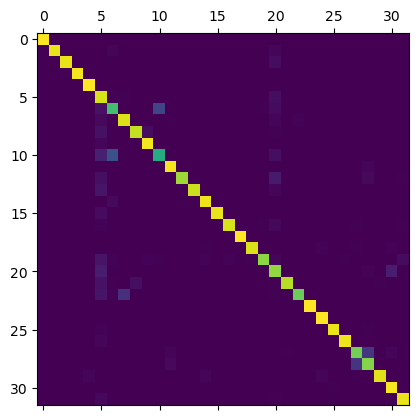

In [32]:
conf_mat = confusion_matrix(y_test, y_pred)
   
plt.matshow(conf_mat)
plt.show()

# Save the Model

In [27]:
import joblib
joblib.dump(Model_RFC, 'model.pkl')

['model.pkl']

In [28]:
model = joblib.load('model.pkl')

# Predict the Unlabeled Data

In [29]:
unlabeled_data_pred = model.predict(unlabeled_data['description'].to_list())

In [30]:
unlabeled_data_pred

array([22, 22, 31, ..., 25, 10,  5])

In [31]:
i = 0

for doc, category in zip(unlabeled_data['description'].to_list(), unlabeled_data_pred):
    
    if i == 6:break
    
    print("-"*55)
    print(doc)
    print(v[category])
    print("-"*55)

    i = i + 1

-------------------------------------------------------
check card adjustment signature credit target com
Supermarkets and Groceries
-------------------------------------------------------
-------------------------------------------------------
check card adjustment signature credit target com
Supermarkets and Groceries
-------------------------------------------------------
-------------------------------------------------------
empower
Utilities
-------------------------------------------------------
-------------------------------------------------------
insta cash repayment
Loans
-------------------------------------------------------
-------------------------------------------------------
check card refund
Transfer
-------------------------------------------------------
-------------------------------------------------------
check card refund
Transfer
-------------------------------------------------------
